# 从Python数据分析入手

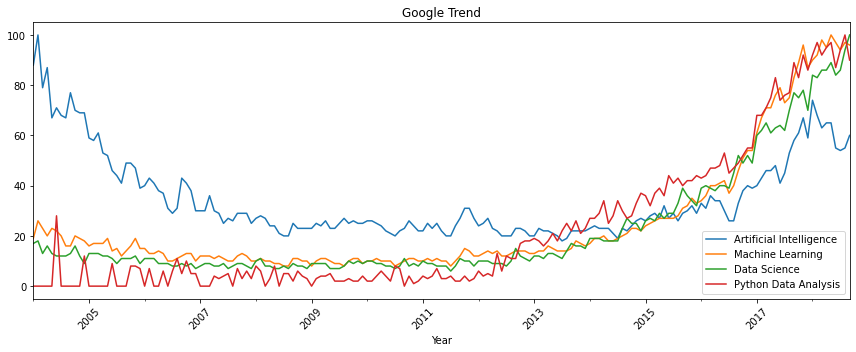

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('./trend.csv', index_col='Year')
df.index = pd.to_datetime(df.index)
df.plot(title='Google Trend', rot=45, figsize=(12, 5))
plt.tight_layout()
plt.show()

# Python高阶应用

## 1. 条件表达式

In [3]:
import math

def get_log(x):
    # 普通写法
    if x > 0:
        y = math.log(x)
    else:
        y = float('nan')
    return y

In [4]:
x = 5
log_val1 = get_log(x)
# 使用条件表达式
log_val2 = math.log(x) if x > 0 else float('nan')

print(log_val1)
print(log_val2)

1.6094379124341003
1.6094379124341003


## 2. 列表推导式

In [18]:
%%timeit
# 找出100000内的偶数(for循环)
l1 = []
for i in range(100000):
    if i % 2 == 0:
        l1.append(i)

9.39 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
# 找出10000内的偶数(列表推导式)
l2 = [i for i in range(100000) if i % 2 == 0]

6.52 ms ± 295 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 3. 浅拷贝和深拷贝

In [20]:
a = {1: [1,2,3]}
print('变量a的内存地址：', id(a))
print('变量a中列表的内存地址：', id(a[1]))

变量a的内存地址： 2427937172504
变量a中列表的内存地址： 2427936483784


* 赋值

In [21]:
b = a
print('变量b的内存地址：', id(b))
print('变量b中列表的内存地址：', id(b[1]))

变量b的内存地址： 2427937172504
变量b中列表的内存地址： 2427936483784


* 浅拷贝:只拷贝父对象

In [22]:
c = a.copy()
print('变量c的内存地址：', id(c))
print('变量c中列表的内存地址：', id(c[1]))

变量c的内存地址： 2427936238832
变量c中列表的内存地址： 2427936483784


* 深拷贝：递归拷贝所有对象

In [23]:
import copy
d = copy.deepcopy(a)
print('变量d的内存地址：', id(d))
print('变量d中列表的内存地址：', id(d[1]))

变量d的内存地址： 2427933811336
变量d中列表的内存地址： 2427937423240


## 4. map()函数

In [24]:
import math

print('示例1，获取两个列表对应位置上的最小值：')
l1 = [1, 3, 5, 20, 9]
l2 = [2, 4, 6, 8, 10]
mins = map(min, l1, l2)
print(list(mins))

# # map()函数操作时，直到访问数据时才会执行
# for item in mins:
#     print(item)

print('示例2，对列表中的元素进行平方根操作：')
squared = map(math.sqrt, l2)
print(squared)
print(list(squared))

示例1，获取两个列表对应位置上的最小值：
[1, 3, 5, 8, 9]
示例2，对列表中的元素进行平方根操作：
[1.4142135623730951, 2.0, 2.449489742783178, 2.8284271247461903, 3.1622776601683795]


## 5. 匿名函数 lambda

In [25]:
# my_func = lambda a, b, c: a * b
# print(my_func)
# print(my_func(1, 2, 3))

# 结合map
print('lambda结合map')
l1 = [1, 3, 5, 7, 9]
l2 = [2, 4, 6, 8, 10]
result = map(lambda x, y: x * 2 + y, l1, l2)
print(list(result))

lambda结合map
[4, 10, 16, 22, 28]


## 6. 自定义排序

In [26]:
# 普通排序
a = [5, 1, 4, 3]
print(sorted(a))
print(a) 

[1, 3, 4, 5]
[5, 1, 4, 3]


In [35]:
# 字符串排序，大小写敏感
strs = ['ccx', 'aaay', 'Dz', 'Bm']
print(sorted(strs))
print(sorted(strs, reverse=True))

['Bm', 'Dz', 'aaay', 'ccx']
['ccx', 'aaay', 'Dz', 'Bm']


In [36]:
# 按照字符串长度排序
print(sorted(strs, key=len))

['Dz', 'Bm', 'ccx', 'aaay']


In [37]:
# 忽略大小写
print(sorted(strs, key=str.lower))

['aaay', 'Bm', 'ccx', 'Dz']


In [38]:
# 自定义排序函数
# 按字符串最后的字符进行排序
def last_char(s):
    return s[-1]

print(sorted(strs, key=last_char))

['Bm', 'ccx', 'aaay', 'Dz']


In [44]:
# 列表中为元组的排序
tuple_list = [('ETH', 194.78), ('BTC', 6292.56), ('EOS', 4.99)]
print(sorted(tuple_list))

[('BTC', 6292.56), ('EOS', 4.99), ('ETH', 194.78)]


In [48]:
print(sorted(tuple_list, key=lambda item: item[1]))

[('EOS', 4.99), ('ETH', 194.78), ('BTC', 6292.56)]


In [50]:
# 字典列表排序
coin_list = [{'name': 'ETH', 'price': 194.78}, 
                 {'name': 'BTC', 'price': 6292.56},
                 {'name': 'EOS', 'price': 4.99}]
print(sorted(coin_list))

TypeError: '<' not supported between instances of 'dict' and 'dict'

In [51]:
from operator import itemgetter
print(sorted(coin_list, key=itemgetter('name')))

[{'name': 'BTC', 'price': 6292.56}, {'name': 'EOS', 'price': 4.99}, {'name': 'ETH', 'price': 194.78}]


In [52]:
from operator import itemgetter
print(sorted(coin_list, key=itemgetter('price')))

[{'name': 'EOS', 'price': 4.99}, {'name': 'ETH', 'price': 194.78}, {'name': 'BTC', 'price': 6292.56}]
